In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sps
from scipy.sparse.linalg import cg as sp_cg

import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

dcolors = {
    "dartmouth_green": "#00693e", 
    "forest_green": "#12312b",
    "river_blue": "#267aba",
    "autumn_brown": "#643c20",
    "bonfire_red": "#9d162e",
    "river_navy": "#003c73",
    "spring_green": "#c4dd88",
    "rich_spring_green": "#a5d75f",
    "summer_yellow": "#f5dc69",
    "bonfire_orange": "#ffa00f",
    "tuck_orange": "#e32d1c",
    "web_violet": "#8a6996",
    "midnight_black": "#000000",
}

from matplotlib.ticker import MaxNLocator


import jlinops
import sampi

In [2]:
def test_signal():

    dom = np.linspace(0, 1, 1000)
    result = np.zeros(1000)
    result = 2*np.sin( (50*np.pi)*dom ) + 25*dom
    result[400:] += 50
    result[700:] += 70

    return result

In [3]:
ground_truth = test_signal()
noise_var = 10.0
noise_sigma = np.sqrt(noise_var)
np.random.seed(0)
y_obs = ground_truth + noise_sigma*np.random.normal(size=len(ground_truth))
n = len(y_obs)

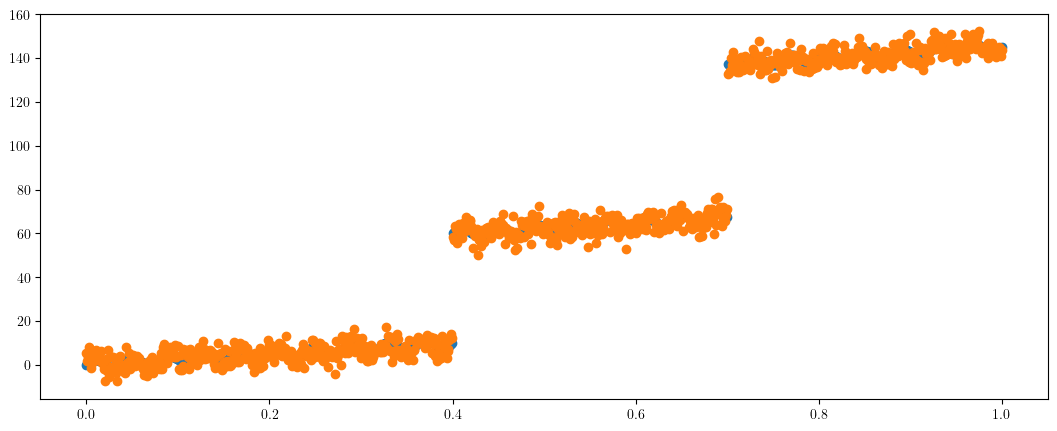

In [4]:
plt.figure(figsize=(13,5))
dom = np.linspace(0, 1, n)
plt.scatter(dom, ground_truth)
plt.scatter(dom, y_obs)
plt.show()

In [5]:
F = jlinops.IdentityOperator( (n,n) )

R1_mat, W1_mat = jlinops.first_order_derivative_1d(n, boundary="none") 
W1 = jlinops.MatrixLinearOperator(W1_mat)
R1 = jlinops.MatrixLinearOperator(R1_mat)

R2_mat, W2_mat = jlinops.second_order_derivative_1d(n, boundary="none")
W2 = jlinops.MatrixLinearOperator(W2_mat)
R2 = jlinops.MatrixLinearOperator(R2_mat)

R3_mat, W3_mat = jlinops.third_order_derivative_1d(n, boundary="none")
W3 = jlinops.MatrixLinearOperator(W3_mat)
R3 = jlinops.MatrixLinearOperator(R3_mat)

In [6]:
R1_mat.toarray()

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., -1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [18]:
delta = 1e-6

def R1pinv_factory(theta):
    return jlinops.BandedCholeskyPinvOperator( jlinops.MatrixLinearOperator( sps.diags( 1.0/np.sqrt(theta) ) @ R1_mat ), delta=delta )

pdata1 = {
    "W": W1,
    "Rpinv_factory": R1pinv_factory,
}


def R2pinv_factory(theta):
    return jlinops.BandedCholeskyPinvOperator( jlinops.MatrixLinearOperator( sps.diags( 1.0/np.sqrt(theta) ) @ R2_mat ), delta=delta )

pdata2 = {
    "W": W2,
    "Rpinv_factory": R2pinv_factory,
}


def R3pinv_factory(theta):
    return jlinops.BandedCholeskyPinvOperator( jlinops.MatrixLinearOperator( sps.diags( 1.0/np.sqrt(theta) ) @ R3_mat ), delta=delta )

pdata3 = {
    "W": W3,
    "Rpinv_factory": R3pinv_factory,
}

In [19]:
# # # Prior parameters
# # reg_lambda = 1e1
# # vartheta = 2/(reg_lambda**2)
# # hyperparams = {
# #     "prior": {
# #         "r": 1.0,
# #         "beta": 1.5 + 1e-2,
# #         "vartheta": vartheta,
# #     },
# #     # "noise_var": {
# #     #     "r": -1.0,
# #     #     "beta": 1,

# #     #     "vartheta": 1e-4,
# #     # }
# # }


# Prior parameters

# reg_lambda = 1e1
# vartheta = 2/(reg_lambda**2)
# hyperparams_r1 = {
#     "prior": {
#         "r": 1.0,
#         "beta": 1.5 + 1e-2,
#         "vartheta": vartheta,
#     },
#     "noise_var": {
#         "r": -1.0,
#         "beta": 1,

#         "vartheta": 1e-4,
#     }
# }


# reg_lambda = 1e1
# vartheta = 2/(reg_lambda**2)
# hyperparams_r2 = {
#     "prior": {
#         "r": 1.0,
#         "beta": 1.5 + 1e-2,
#         "vartheta": vartheta,
#     },
#     "noise_var": {
#         "r": -1.0,
#         "beta": 1,

#         "vartheta": 1e-4,
#     }
# }


# reg_lambda = 1e1
# vartheta = 2/(reg_lambda**2)
# hyperparams_r3 = {
#     "prior": {
#         "r": 1.0,
#         "beta": 1.5 + 1e-2,
#         "vartheta": vartheta,
#     },
#     "noise_var": {
#         "r": -1.0,
#         "beta": 1,
#         "vartheta": 1e-4,
#     }
# }





# Prior parameters


vartheta = 1e-3

hyperparams_r1 = {
    "prior": {
        "r": -1.0,
        "beta": 1.0,
        "vartheta": vartheta,
    },
    "noise_var": {
        "r": -1.0,
        "beta": 1,
        "vartheta": 1e-4,
    }
}


hyperparams_r2 = {
    "prior": {
        "r": -1.0,
        "beta": 1.0,
        "vartheta": vartheta,
    },
    "noise_var": {
        "r": -1.0,
        "beta": 1,
        "vartheta": 1e-4,
    }
}


hyperparams_r3 = {
    "prior": {
        "r": -1.0,
        "beta": 1.0,
        "vartheta": vartheta,
    },
    "noise_var": {
        "r": -1.0,
        "beta": 1,
        "vartheta": 1e-4,
    }
}




# Create solver
# solver_r1 = sampi.IASSolver(F, R1, y_obs, hyperparams, noise_var=noise_var, pdata=pdata1)
# solver_r2 = sampi.IASSolver(F, R2, y_obs, hyperparams, noise_var=noise_var, pdata=pdata2)
# solver_r3 = sampi.IASSolver(F, R3, y_obs, hyperparams, noise_var=noise_var, pdata=pdata3)

solver_r1 = sampi.IASSolver(F, R1, y_obs, hyperparams_r1, noise_var=None, pdata=pdata1)
solver_r2 = sampi.IASSolver(F, R2, y_obs, hyperparams_r2, noise_var=None, pdata=pdata2)
solver_r3 = sampi.IASSolver(F, R3, y_obs, hyperparams_r3, noise_var=None, pdata=pdata3)

In [20]:
# Initialize everything at the least-squares reconstruction?
x0_r1, _ = sp_cg( (F.T @ F) + 1.0*(R1.T @ R1), F.T @ y_obs, tol=1e-4 )
x0_r2, _ = sp_cg( (F.T @ F) + 1.0*(R2.T @ R2), F.T @ y_obs, tol=1e-4 )
x0_r3, _ = sp_cg( (F.T @ F) + 1.0*(R3.T @ R3), F.T @ y_obs, tol=1e-4 )

In [21]:
data_r1 = solver_r1.solve(max_iters=100, x0=x0_r1, 
                          priorconditioning=False, early_stopping=True, 
                          warmstarting=True, eps=1e-3,
                          x_update_solver_params={"tol":1e-3})

In [22]:
data_pr1 = solver_r1.solve(max_iters=100, x0=x0_r1, 
                           priorconditioning=True, early_stopping=True, 
                           warmstarting=True, eps=1e-4,
                           x_update_solver_params={"tol":1e-3})

In [23]:
data_r2 = solver_r2.solve(max_iters=100, x0=x0_r2, 
                          priorconditioning=False, early_stopping=True, 
                          warmstarting=True, eps=1e-4,
                          x_update_solver_params={"tol":1e-3})

In [24]:
data_pr2 = solver_r2.solve(max_iters=100, x0=x0_r2, 
                          priorconditioning=True, early_stopping=True, 
                          warmstarting=True, eps=1e-4,
                          x_update_solver_params={"tol":1e-3})

In [25]:
data_r3 = solver_r3.solve(max_iters=100, x0=x0_r3, 
                           priorconditioning=False, early_stopping=True, 
                           warmstarting=True, eps=1e-4,
                           x_update_solver_params={"tol":1e-3})

In [26]:
data_pr3 = solver_r3.solve(max_iters=100, x0=x0_r3, 
                           priorconditioning=True, early_stopping=True, 
                           warmstarting=True, eps=1e-4,
                           x_update_solver_params={"tol":1e-3})

In [27]:
noise_var_R1 = data_r1["noise_var"]
noise_var_R2 = data_r2["noise_var"]
noise_var_R3 = data_r3["noise_var"]


print(f"learned noise variance with R1: {noise_var_R1}")
print(f"learned noise variance with R2: {noise_var_R2}")
print(f"learned noise variance with R3: {noise_var_R3}")

learned noise variance with R1: 10.77902439021739
learned noise variance with R2: 10.859763415060138
learned noise variance with R3: 6.814110624572076


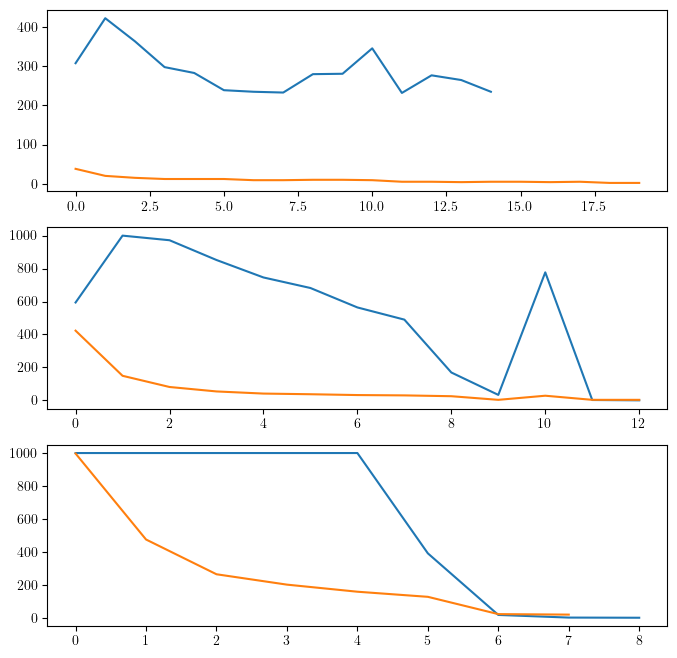

In [16]:
fig, axs = plt.subplots(3,1,figsize=(8,8))

axs[0].plot(data_r1["n_cg_its_per_iteration"])
axs[0].plot(data_pr1["n_cg_its_per_iteration"])

axs[1].plot(data_r2["n_cg_its_per_iteration"])
axs[1].plot(data_pr2["n_cg_its_per_iteration"])

axs[2].plot(data_r3["n_cg_its_per_iteration"])
axs[2].plot(data_pr3["n_cg_its_per_iteration"])

plt.show()

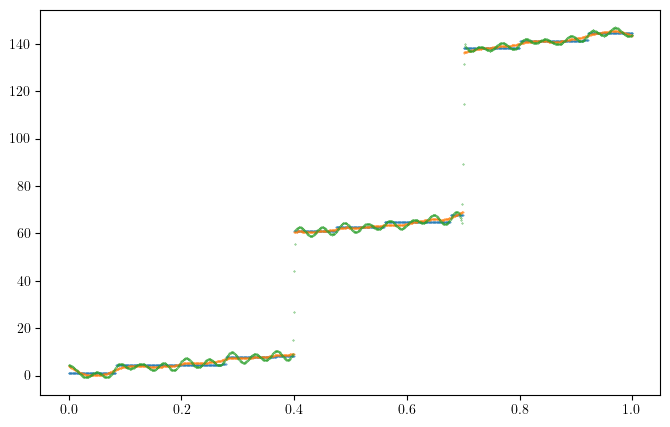

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(dom, data_r1["x"], s=0.1)
plt.scatter(dom, data_r2["x"], s=0.1)
plt.scatter(dom, data_r3["x"], s=0.1)
#plt.plot(dom, ground_truth)
plt.show()

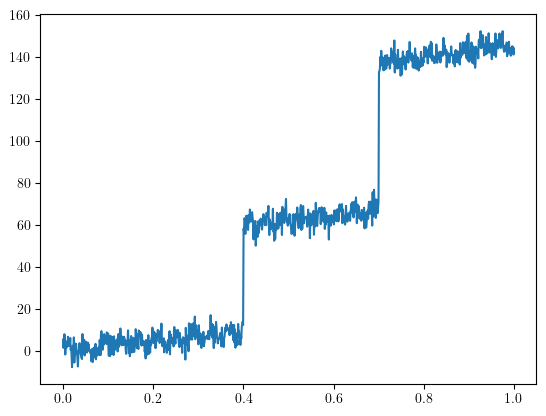

In [15]:
plt.plot(dom, y_obs)
plt.show()

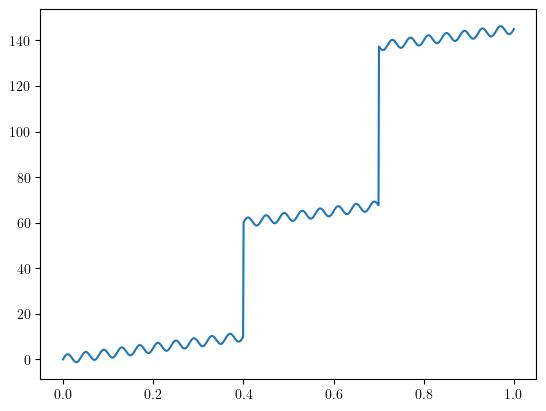

In [16]:
plt.plot(dom, ground_truth)
plt.show()

# Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


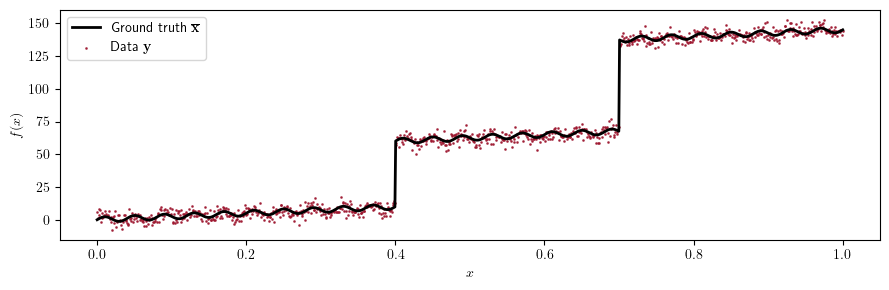

In [148]:
plt.figure(figsize=(9,3))

plt.plot(dom, ground_truth, label="Ground truth $\overline{\mathbf{x}}$", lw=2.0, color="black")
plt.scatter(dom, y_obs, s=0.9, alpha=0.8, color=dcolors["bonfire_red"], label="Data $\mathbf{y}$")
plt.title("")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.legend()

plt.tight_layout()
plt.savefig("toy_data.png", dpi=250, bbox_inches="tight")
plt.savefig("toy_data.eps", dpi=250, bbox_inches="tight")

plt.show()

In [149]:
dcolors.keys()

dict_keys(['dartmouth_green', 'forest_green', 'river_blue', 'autumn_brown', 'bonfire_red', 'river_navy', 'spring_green', 'rich_spring_green', 'summer_yellow', 'bonfire_orange', 'tuck_orange', 'web_violet', 'midnight_black'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


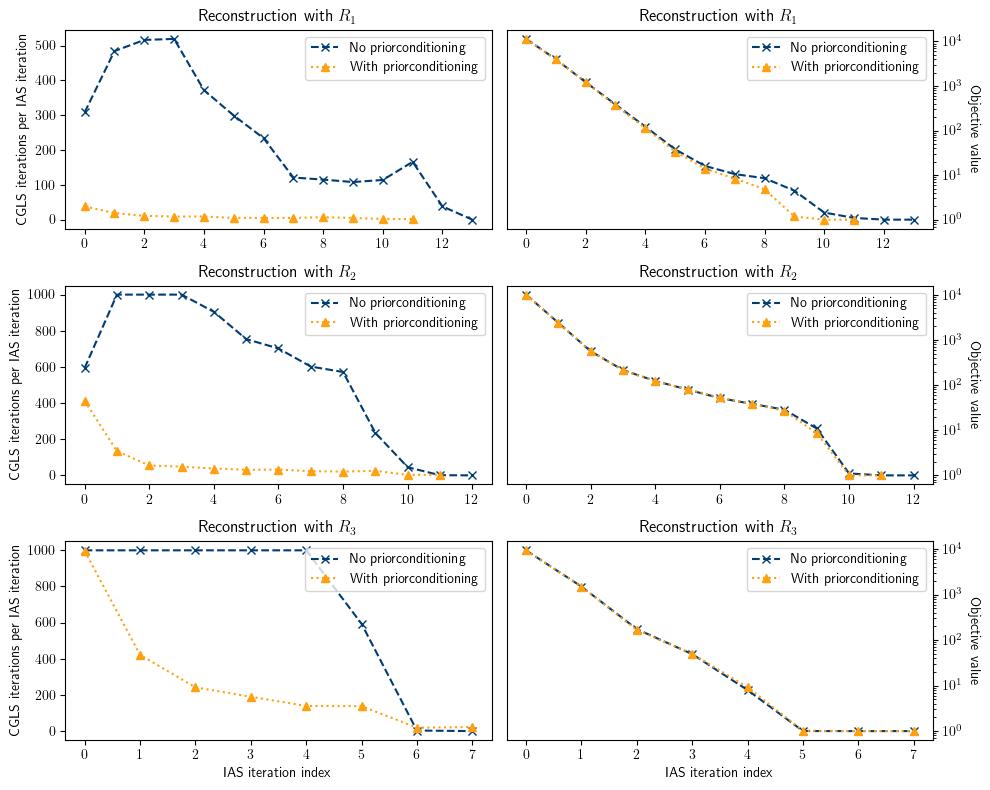

In [150]:
fig, axs = plt.subplots(3,2,figsize=(10,8))


axs[0,0].plot(data_r1["n_cg_its_per_iteration"], color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[0,0].plot(data_pr1["n_cg_its_per_iteration"], color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":")
axs[0,1].semilogy(data_r1["obj_vals"] + np.abs(np.amin(data_r1["obj_vals"] )) + 1 , color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[0,1].semilogy(data_pr1["obj_vals"] + np.abs(np.amin(data_pr1["obj_vals"] )) + 1 , color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":" )
axs[0,0].set_ylabel("CGLS iterations per IAS iteration")
axs[0,1].yaxis.tick_right()
axs[0,1].yaxis.set_label_position("right")
axs[0,1].set_ylabel("Objective value", rotation=270, va="bottom")

axs[0,0].set_title("Reconstruction with $R_1$")
axs[0,1].set_title("Reconstruction with $R_1$")


axs[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0,0].legend()
axs[0,1].legend()



axs[1,0].plot(data_r2["n_cg_its_per_iteration"], color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[1,0].plot(data_pr2["n_cg_its_per_iteration"], color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":")
axs[1,1].semilogy( data_r2["obj_vals"] + np.abs(np.amin(data_r2["obj_vals"] )) + 1 , color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[1,1].semilogy( data_pr2["obj_vals"] + np.abs(np.amin(data_pr2["obj_vals"] )) + 1 , color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":")
axs[1,0].set_ylabel("CGLS iterations per IAS iteration")
axs[1,1].yaxis.tick_right()
axs[1,1].yaxis.set_label_position("right")
axs[1,1].set_ylabel("Objective value", rotation=270, va="bottom")

axs[1,0].set_title("Reconstruction with $R_2$")
axs[1,1].set_title("Reconstruction with $R_2$")

axs[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[1,0].legend()
axs[1,1].legend()


axs[2,0].plot(data_r3["n_cg_its_per_iteration"], color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[2,0].plot(data_pr3["n_cg_its_per_iteration"], color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":")
axs[2,1].semilogy( data_r3["obj_vals"] + np.abs(np.amin(data_r3["obj_vals"] )) + 1, color=dcolors["river_navy"], label="No priorconditioning", marker="x", ls="--")
axs[2,1].semilogy( data_pr3["obj_vals"] + np.abs(np.amin(data_pr3["obj_vals"] )) + 1 , color=dcolors["bonfire_orange"], label="With priorconditioning", marker="^", ls=":")
axs[2,0].set_ylabel("CGLS iterations per IAS iteration")
axs[2,1].yaxis.tick_right()
axs[2,1].yaxis.set_label_position("right")
axs[2,1].set_ylabel("Objective value", rotation=270, va="bottom")

axs[2,0].set_title("Reconstruction with $R_3$")
axs[2,1].set_title("Reconstruction with $R_3$")

axs[2,0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2,1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[2,0].legend()
axs[2,1].legend()

axs[2,1].set_xlabel("IAS iteration index")
axs[2,0].set_xlabel("IAS iteration index")


fig.tight_layout()

fig.savefig("cgls_obj_data.png", dpi=250, bbox_inches="tight")
fig.savefig("cgls_obj_data.eps", bbox_inches="tight")


plt.show()

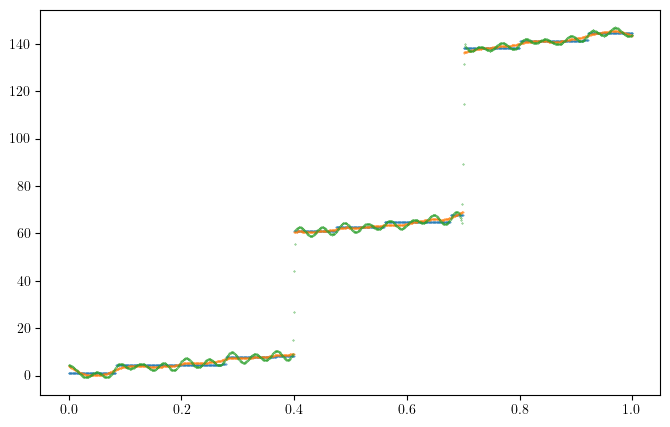

In [151]:
plt.figure(figsize=(8,5))
plt.scatter(dom, data_r1["x"], s=0.1)
plt.scatter(dom, data_r2["x"], s=0.1)
plt.scatter(dom, data_r3["x"], s=0.1)
#plt.plot(dom, ground_truth)
plt.show()

In [152]:
len(data_r3["theta"])

997

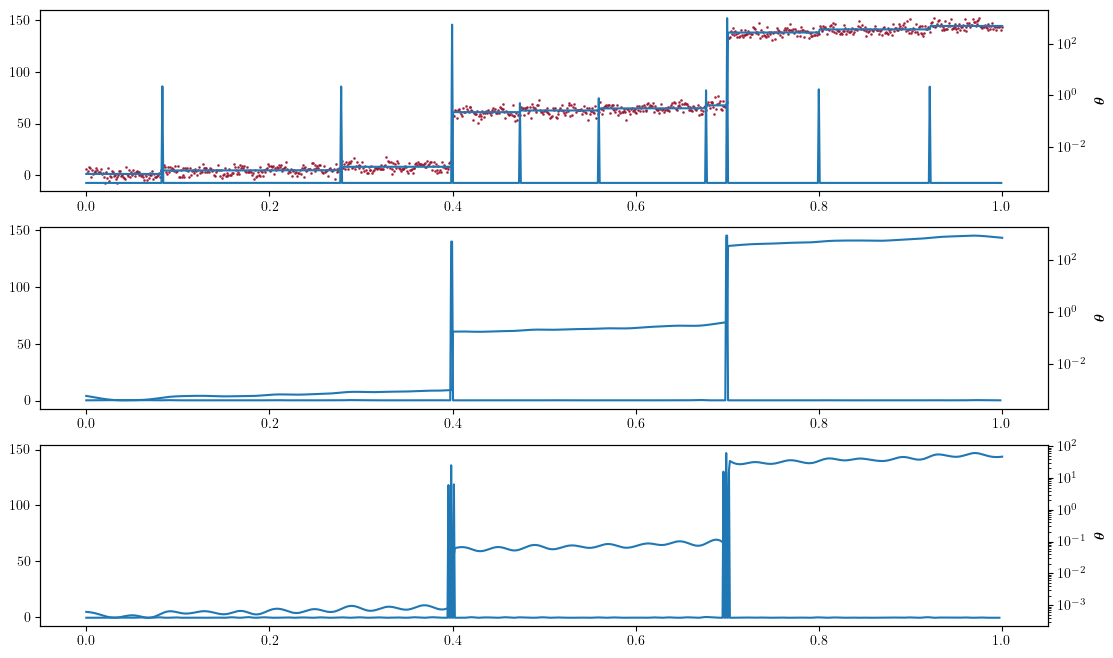

In [153]:
fig, axs = plt.subplots(3, 1, figsize=(13,8))

axs[0].plot(dom, data_r1["x"])
axs[0].scatter(dom, y_obs, s=0.9, alpha=0.8, color=dcolors["bonfire_red"], label="Data")
ax2 = axs[0].twinx() 
ax2.set_ylabel('$\\boldsymbol{\\theta}$', rotation=270, va="bottom")   
ax2.plot(dom[:-1], data_r1["theta"])
ax2.tick_params(axis='y')
ax2.set_yscale('log')

axs[1].plot(dom, data_r2["x"])
ax2 = axs[1].twinx() 
ax2.set_ylabel('$\\boldsymbol{\\theta}$', rotation=270, va="bottom")  
ax2.plot(dom[:-2], data_r2["theta"])
ax2.tick_params(axis='y')
ax2.set_yscale('log')

axs[2].plot(dom, data_r3["x"])
ax2 = axs[2].twinx() 
ax2.set_ylabel('$\\boldsymbol{\\theta}$', rotation=270, va="bottom")  
ax2.plot(dom[:-3], data_r3["theta"])
ax2.tick_params(axis='y')
ax2.set_yscale('log')



#axs[0].plot(dom, data_pr3["x"])


plt.show()

/var/folders/8y/4mq6cs_x20j1gp06wytwhlwm0000gn/T/ipykernel_8104/282682920.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


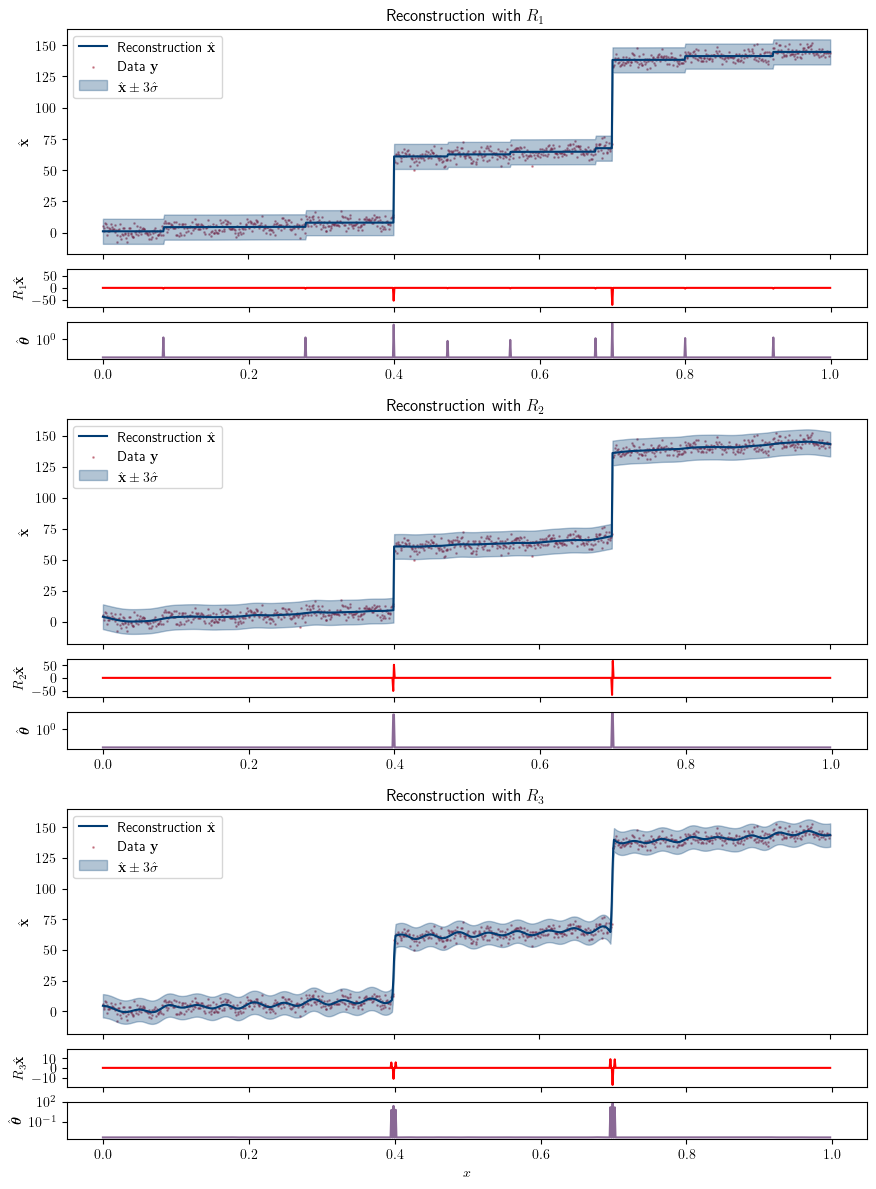

In [216]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the plots
x = np.linspace(0, 10, 100)
y_main = np.sin(x)  # Data for the main plots
y_sub1 = np.cos(x)  # Data for the first set of skinny subplots
y_sub2 = np.cos(x) + np.sin(x)  # Data for the second set of skinny subplots

fig = plt.figure(figsize=(10, 15))

# Define vertical spacing and plot heights
main_plot_height = 0.15
sub_plot_height = 0.025
spacing_between_subplots = 0.01  # Space between the two subplots
spacing_below_main = 0.01       # Space directly below the main plot before first subplot
spacing_between_pairs = 0.04     # Space between each set (main + 2 subs) and the next set

# Calculate the bottom start position for the first set of plots (top down)
bottoms_main = [0.95 - i * (main_plot_height + 2 * sub_plot_height + spacing_below_main + spacing_between_subplots + spacing_between_pairs) for i in range(3)]

xs = [dom, dom, dom]
ys_r = [data_r1["x"], data_r2["x"], data_r3["x"]]
ys_data = [y_obs, y_obs, y_obs]
xs_thetas = [dom[:-1], dom[:-2], dom[:-3]]
ys_thetas = [data_r1["theta"], data_r2["theta"], data_r3["theta"]]
ys_rxs = [ R1_mat @ data_r1["x"], R2_mat @ data_r2["x"], R3_mat @ data_r3["x"]  ]
rx_labels = [ "$R_1 \hat{\mathbf{x}}$", "$R_2 \hat{\mathbf{x}}$", "$R_3 \hat{\mathbf{x}}$"  ]
titles = [  "Reconstruction with $R_1$",  "Reconstruction with $R_2$",  "Reconstruction with $R_3$" ]
noise_vars = [ data_r1["noise_var"], data_r2["noise_var"], data_r3["noise_var"]  ]

axs[0].plot(dom, data_r1["x"])
axs[0].scatter(dom, y_obs, s=0.9, alpha=0.8, color=dcolors["bonfire_red"], label="Data")

for i, bottom in enumerate(bottoms_main):
    # Main plot
    ax_main = fig.add_axes([0.1, bottom - main_plot_height, 0.8, main_plot_height])
    ax_main.plot(xs[i], ys_r[i], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
    ax_main.scatter(xs[i], ys_data[i], s=0.9, alpha=0.4, color=dcolors["bonfire_red"], label="Data $\mathbf{y}$")
    ax_main.set_xticklabels([])  # Hide x-ticks for cleaner look
    ax_main.set_ylabel('$\hat{\mathbf{x}}$')
    ax_main.set_title(titles[i])

    ax_main.fill_between(xs[i],  ys_r[i] - 3*np.sqrt(noise_vars[i]) ,  ys_r[i] + 3*np.sqrt(noise_vars[i]) , alpha=0.3, label="$\hat{\mathbf{x}} \pm 3 \hat{\sigma}$" , color=dcolors["river_navy"] )
    ax_main.legend()

    # First skinny subplot directly underneath the main plot
    ax_sub1 = fig.add_axes([0.1, bottom - main_plot_height - spacing_below_main - sub_plot_height, 0.8, sub_plot_height])
    max_abs_y = np.max(np.abs(ys_rxs[i]))
    ax_sub1.plot(xs_thetas[i], ys_rxs[i], color='r')
    tau = 1.1
    ax_sub1.set_ylim(-tau*max_abs_y, tau*max_abs_y)
    ax_sub1.set_xticklabels([])  # Hide x-ticks for the first sub plot
    ax_sub1.set_ylabel(rx_labels[i])

    # Second skinny subplot directly underneath the first skinny subplot
    ax_sub2 = fig.add_axes([0.1, bottom - main_plot_height - spacing_below_main - 2 * sub_plot_height - spacing_between_subplots, 0.8, sub_plot_height])
    ax_sub2.semilogy(xs_thetas[i], ys_thetas[i], color=dcolors["web_violet"])
    ax_sub2.set_ylabel('$\hat{\\boldsymbol{\\theta}}$')

    # Only the last subplot in the figure should have x-labels
    if i == len(bottoms_main) - 1:
        ax_sub2.set_xlabel('$x$')


fig.tight_layout()

#fig.savefig("reconstruction_comparison.png", dpi=250, bbox_inches="tight")
#fig.savefig("reconstruction_comparison.eps", bbox_inches="tight")


plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


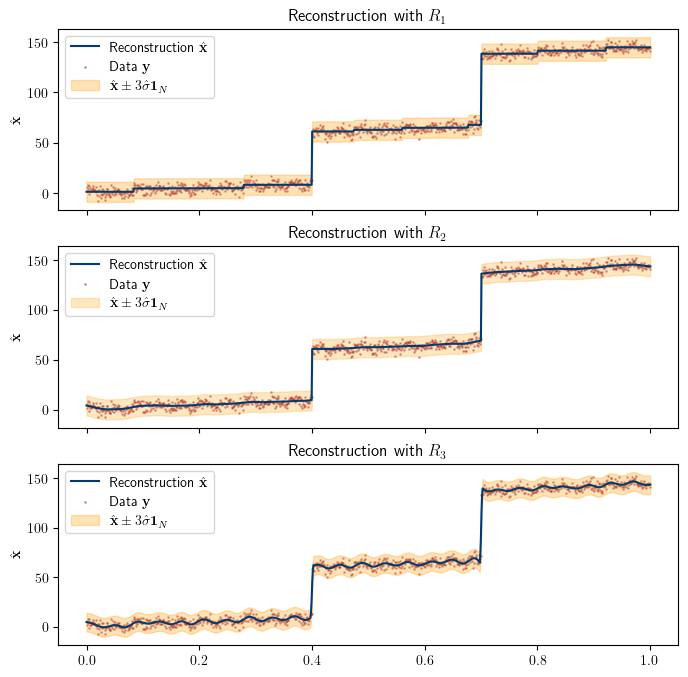

In [244]:
fig, axs = plt.subplots(3, 1, figsize=(8,8))

ys_r = [data_r1["x"], data_r2["x"], data_r3["x"]]
noise_vars = [ data_r1["noise_var"], data_r2["noise_var"], data_r3["noise_var"]  ]
end = 2000
i = 0
axs[0].plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
axs[0].scatter(xs[i][:end], ys_data[i][:end], s=0.9, alpha=0.4, color=dcolors["bonfire_red"], label="Data $\mathbf{y}$")
axs[0].set_xticklabels([])  # Hide x-ticks for cleaner look
axs[0].set_ylabel('$\hat{\mathbf{x}}$')
axs[0].set_title(titles[i])
axs[0].fill_between(xs[i][:end],  ys_r[i][:end] - 3*np.sqrt(noise_vars[i]) ,  ys_r[i][:end] + 3*np.sqrt(noise_vars[i]) , alpha=0.3, label="$\hat{\mathbf{x}} \pm 3 \hat{\sigma} \mathbf{1}_{N}$" , color=dcolors["bonfire_orange"] )
axs[0].legend()

i = 1
axs[1].plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
axs[1].scatter(xs[i][:end], ys_data[i][:end], s=0.9, alpha=0.4, color=dcolors["bonfire_red"], label="Data $\mathbf{y}$")
axs[1].set_xticklabels([])  # Hide x-ticks for cleaner look
axs[1].set_ylabel('$\hat{\mathbf{x}}$')
axs[1].set_title(titles[i])
axs[1].fill_between(xs[i][:end],  ys_r[i][:end] - 3*np.sqrt(noise_vars[i]) ,  ys_r[i][:end] + 3*np.sqrt(noise_vars[i]) , alpha=0.25, label="$\hat{\mathbf{x}} \pm 3 \hat{\sigma} \mathbf{1}_{N}$" , color=dcolors["bonfire_orange"] )
axs[1].legend()

i = 2
axs[2].plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
axs[2].scatter(xs[i][:end], ys_data[i][:end], s=0.9, alpha=0.4, color=dcolors["bonfire_red"], label="Data $\mathbf{y}$")
#axs[2].set_xticklabels([])  # Hide x-ticks for cleaner look
axs[2].set_ylabel('$\hat{\mathbf{x}}$')
axs[2].set_title(titles[i])
axs[2].fill_between(xs[i][:end],  ys_r[i][:end] - 3*np.sqrt(noise_vars[i]) ,  ys_r[i][:end] + 3*np.sqrt(noise_vars[i]) , alpha=0.3, label="$\hat{\mathbf{x}} \pm 3 \hat{\sigma} \mathbf{1}_{N}$" , color=dcolors["bonfire_orange"] )
axs[2].legend()

fig.savefig("reconstruction_comparison_small.png", dpi=250, bbox_inches="tight")
fig.savefig("reconstruction_comparison_small.eps", bbox_inches="tight")

plt.show()

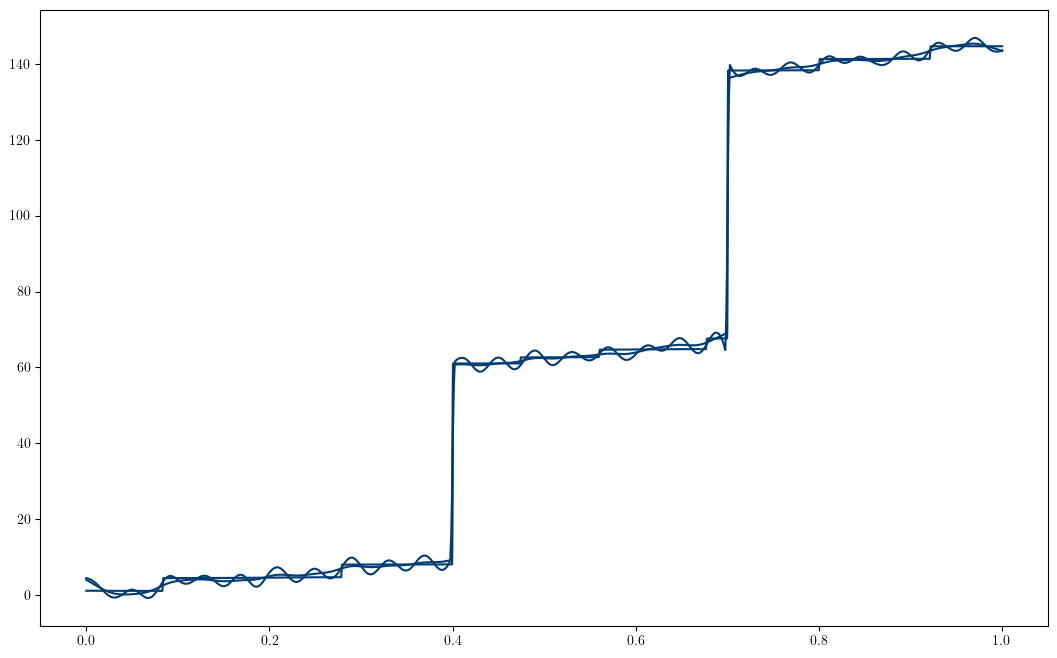

In [237]:
ys_r = [data_r1["x"], data_r2["x"], data_r3["x"]]
noise_vars = [ data_r1["noise_var"], data_r2["noise_var"], data_r3["noise_var"]  ]
end = 2000


plt.figure(figsize=(13,8))

i = 0
plt.plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
i = 1
plt.plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")
i = 2
plt.plot(xs[i][:end], ys_r[i][:end], color=dcolors["river_navy"] , label="Reconstruction $\hat{\mathbf{ x }}$")

plt.show()

# Sampling

In [29]:
from sampi import CGLSGaussianSampler,  PriorconditionedIASGaussianSampler

In [20]:
data_r1["theta"]

array([4.00003825e-04, 4.00003549e-04, 4.00006794e-04, 4.00031263e-04,
       4.00070509e-04, 4.00047793e-04, 4.00069421e-04, 4.00063984e-04,
       4.00061802e-04, 4.00071630e-04, 4.00078042e-04, 4.00129587e-04,
       4.00161577e-04, 4.00173084e-04, 4.00198757e-04, 4.00203563e-04,
       4.00264454e-04, 4.00235708e-04, 2.47603229e-01, 4.00212061e-04,
       4.00105758e-04, 4.00114561e-04, 4.00132973e-04, 4.00093531e-04,
       4.00142099e-04, 4.00072594e-04, 4.00061360e-04, 4.00041381e-04,
       4.00069202e-04, 4.00088669e-04, 4.00070732e-04, 4.00065806e-04,
       4.00031043e-04, 4.00001534e-04, 4.00000003e-04, 4.00000396e-04,
       4.00000728e-04, 4.00005913e-04, 4.00002077e-04, 4.00000702e-04,
       4.00000487e-04, 4.00008294e-04, 4.00027356e-04, 4.00001809e-04,
       4.00002252e-04, 4.00001457e-04, 4.00006447e-04, 4.00000000e-04,
       4.00002314e-04, 4.00000539e-04, 4.00000270e-04, 4.00002191e-04,
       4.00003259e-04, 4.00001071e-04, 4.00004047e-04, 4.00016452e-04,
      

In [ ]:
(1.0/np.sqrt(data_r1["noise_var"]))*solver_r1.F

In [23]:
factors = [(1.0/np.sqrt(data_r1["noise_var"]))*solver_r1.F, 
           jlinops.DiagonalOperator(1.0/np.sqrt(data_r1["theta"])) @ solver_r1.R ]

shifts = [ (1.0/np.sqrt(data_r1["noise_var"]))*solver_r1.y, None  ]

cgls_sampler = CGLSGaussianSampler(factors, shifts)

In [24]:
z = cgls_sampler.sample(n_samples=100)

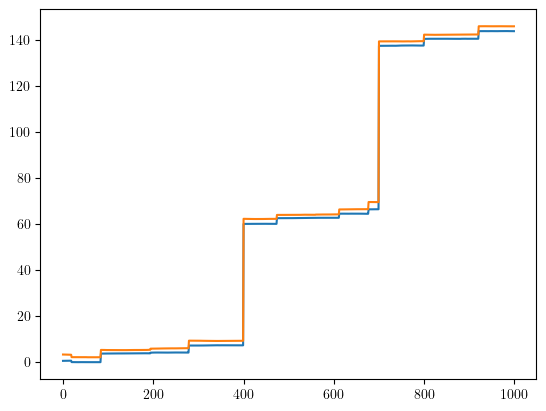

In [28]:
# plt.plot(data_r1["x"])
# plt.plot(z["mean"])
plt.plot(z["mean"] - 3*z["stdev"])
plt.plot(z["mean"] + 3*z["stdev"])
plt.show()

In [ ]:
factors = [(1.0/np.sqrt(data_r1["noise_var"]))*solver_r1.F, 
           jlinops.DiagonalOperator(1.0/np.sqrt(data_r1["theta"])) @ solver_r1.R ]

shifts = [ (1.0/np.sqrt(data_r1["noise_var"]))*solver_r1.y, None  ]

cgls_sampler = CGLSGaussianSampler(factors, shifts)

In [32]:
# Make pcgls sampler
pcgls_sampler = PriorconditionedIASGaussianSampler(solver_r1.F, solver_r1.R, solver_r1.y, data_r1["theta"], noise_var=data_r1["noise_var"], pdata=pdata1)

In [34]:
zp = pcgls_sampler.sample(n_samples=1000)

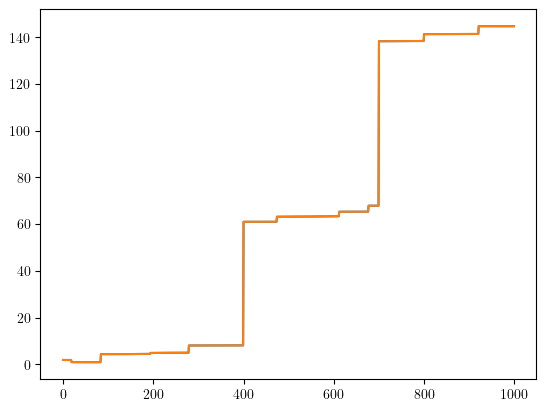

In [38]:
plt.plot(zp["mean"])
plt.plot(zp["mean"])
plt.show()